In [2]:
# plots inline for ipython
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [13]:
'''
train cnn mode for sentiment classification on yelp data set
'''
import pandas as pd
import numpy as np
from Word2VecUtility import Word2VecUtility
from gensim.models import word2vec
from keras.preprocessing import sequence

data = pd.read_csv('review_sub_1000000.csv', sep=',', escapechar='\\', encoding='utf-8', error_bad_lines=False)
data = data[(data.stars <= 5)&(data.stars >= 1)]
data = data.sample(frac=0.1)
w2v_model = word2vec.Word2Vec.load("300features_40minwords_10context_1000000")
data['text'] = data['text'].astype(str)

b'Skipping line 19138: expected 10 fields, saw 11\nSkipping line 21383: expected 10 fields, saw 11\n'
b'Skipping line 99592: expected 10 fields, saw 11\n'
b'Skipping line 151848: expected 10 fields, saw 11\n'
b'Skipping line 246253: expected 10 fields, saw 11\n'
b'Skipping line 311826: expected 10 fields, saw 11\n'
b'Skipping line 328900: expected 10 fields, saw 11\nSkipping line 333983: expected 10 fields, saw 11\n'
b'Skipping line 395880: expected 10 fields, saw 11\nSkipping line 436837: expected 10 fields, saw 11\nSkipping line 444863: expected 10 fields, saw 11\nSkipping line 450872: expected 10 fields, saw 11\n'
b'Skipping line 495685: expected 10 fields, saw 11\n'
b'Skipping line 539385: expected 10 fields, saw 11\nSkipping line 557843: expected 10 fields, saw 11\n'
b'Skipping line 612680: expected 10 fields, saw 11\nSkipping line 625840: expected 10 fields, saw 11\nSkipping line 634957: expected 10 fields, saw 11\nSkipping line 654783: expected 10 fields, saw 11\n'
b'Skipping li

In [149]:
w2v_model = word2vec.Word2Vec.load("300features_40minwords_10context_1000000")

In [160]:
w2v_model.wv.most_similar("mexican")

[('italian', 0.9594756960868835),
 ('japanese', 0.9486186504364014),
 ('asian', 0.9400120973587036),
 ('chinese', 0.9363560676574707),
 ('fusion', 0.9360105991363525),
 ('spanish', 0.9350817203521729),
 ('filipino', 0.9337738752365112),
 ('hawaiian', 0.9272395372390747),
 ('english', 0.9264158010482788),
 ('american', 0.9253512620925903)]

In [161]:
w2v_model.wv.most_similar("taco") 

[('burrito', 0.9015251398086548),
 ('enchilada', 0.8428153395652771),
 ('ramen', 0.8182293176651001),
 ('kfc', 0.8077092170715332),
 ('bowls', 0.7908867597579956),
 ('quesadilla', 0.7805956602096558),
 ('italian', 0.7760134339332581),
 ('poke', 0.7691671252250671),
 ('jimmy', 0.7669188976287842),
 ('nacho', 0.7581745386123657)]

In [187]:
sim = w2v_model.wv.n_similarity(['sushi', 'shop'], ['japanese', 'restaurant'])
print(sim)

0.817258151686987


In [202]:
w2v_model.wv.most_similar(positive=['coffee', 'italy'], negative = ['taiwan'], topn=10)

[('smoothie', 0.7865440249443054),
 ('pastries', 0.7633628249168396),
 ('soda', 0.7583913207054138),
 ('boba', 0.7531607151031494),
 ('desserts', 0.7493821382522583),
 ('iced', 0.7489231824874878),
 ('apps', 0.7409639954566956),
 ('dessert', 0.740259051322937),
 ('juice', 0.7396405935287476),
 ('pastry', 0.7343471646308899)]

In [230]:
w2v_model.wv.most_similar(positive=['chipotle', 'mexican'], negative = ['american'], topn=1)

[('subway', 0.8572237491607666)]

In [ ]:
w2v_model.wv.most_similar(positive=['coffee', 'french'], negative = ['taiwan'], topn=10)

In [198]:
w2v_model.wv.most_similar(positive = ["sushi","shop"]) 

[('buffet', 0.8227237462997437),
 ('nigiri', 0.820068895816803),
 ('sashimi', 0.8176635503768921),
 ('joint', 0.817276120185852),
 ('district', 0.8158387541770935),
 ('deli', 0.8124804496765137),
 ('poke', 0.803809404373169),
 ('bistro', 0.8011462092399597),
 ('japanese', 0.7994210720062256),
 ('goers', 0.7972640991210938)]

In [181]:
w2v_model.wv.most_similar(positive = ["miso"], negative = ["mexican"]) 

[('onions', 0.6205604076385498),
 ('mushrooms', 0.6087561845779419),
 ('peppers', 0.5981951355934143),
 ('artichoke', 0.5921621918678284),
 ('salt', 0.590464174747467),
 ('tomatoes', 0.588054895401001),
 ('avocado', 0.5865614414215088),
 ('brie', 0.5865062475204468),
 ('banana', 0.5777559280395508),
 ('potato', 0.5707169771194458)]

In [12]:
print(w2v_model.wv.syn0.shape)

(22340, 300)


/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:1: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).
  if __name__ == '__main__':


In [92]:
# data embedding parameters
max_length = 300
# max_words = 5000
# max_words = model.syn0.shape[0]
num_features = 300


# index trick parameters
index_from = 3
# padding = 0
start = 1
oov = 2

words_set = set(w2v_model.wv.index2word)
word2index = { word : (i + index_from) for i,word in enumerate(words_set) }
index2word = { i : word for word, i in word2index.items() }
index2word[0] = '0'
index2word[1] = '1'
index2word[2] = '2'

AttributeError: 'Model' object has no attribute 'wv'

In [42]:
import nltk
import time
nltk.download('stopwords')

# 'Word2Vec' object does not support item assignment
padding_model = {}
padding_model['0'] = np.random.standard_normal(num_features)
padding_model['1'] = np.random.standard_normal(num_features)
padding_model['2'] = np.random.standard_normal(num_features)

t0 = time.time()
reviews_words = []
counter = 0
t = 0
for review in data["text"]:
    review_words = Word2VecUtility.review_to_wordlist(review, remove_stopwords = True)
    # each word index increased with 3.
    review_words = [start] + [word2index[w] if (w in words_set) else oov for w in review_words]
#   review_words = [oov if (ix > (max_words + index_from)) else ix for ix in review_words]
    reviews_words.append(review_words)
    if counter % 100000 == 99999:
        t += 1
        print("Finished {}00k out of 10000000".format(t))
    counter += 1
    

# padding with 0, each review has max_length now.
reviews_words = sequence.pad_sequences(reviews_words, maxlen = max_length, padding='post', truncating='post')
print(reviews_words.shape)

[nltk_data] Downloading package stopwords to /home/ubuntu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Finished 100k out of 10000000
(100002, 100)


In [43]:
t1 = time.time()
print(t1-t0)

50.21420097351074


In [44]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.embeddings import Embedding
from keras.layers.convolutional import Convolution1D, MaxPooling1D
from keras.callbacks import EarlyStopping, ModelCheckpoint

data_matrix = np.empty((reviews_words.shape[0], max_length, num_features))
for i in range(0, reviews_words.shape[0]):
    data_matrix[i,:,:] = np.array([model[index2word[ix]] if (index2word[ix] in model) else padding_model[index2word[ix]] for ix in reviews_words[0]])

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:9: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


In [45]:
# del(reviews_words)

labels = data["stars"]

def vectorize_labels(labels, nums):
    labels = np.asarray(labels, dtype='int32')
    length = len(labels)
    Y = np.zeros((length, nums))
    for i in range(length):
        Y[i, (labels[i]-1)] = 1.
    return Y
labels = vectorize_labels(labels, 5)

In [48]:
from sklearn.cross_validation import train_test_split

index = np.arange(data_matrix.shape[0])
train_index, valid_index = train_test_split(index, train_size = 0.8, random_state = 123)
del(index, data)

train_data = data_matrix[train_index]
valid_data = data_matrix[valid_index]
train_labels = labels[train_index]
valid_labels = labels[valid_index]

print(train_data.shape)
print(valid_data.shape)

(80001, 100, 300)
(20001, 100, 300)


In [53]:
# model training parameters
batch_size = 256
# embedding_dims = 100
nb_filter = 250
filter_length = 3
hidden_dims = 250
nb_epoch = 10

In [56]:
t0 = time.time()

tf_model = Sequential()

# we start off with an efficient embedding layer which maps
# our vocab indices into embedding_dims dimensions
# model.add(Embedding(max_features, embedding_dims, input_length=maxlen))

tf_model.add(Dropout(0.25))

# we add a Convolution1D, which will learn nb_filter
# word group filters of size filter_length:

# filter_length is like filter size, subsample_length is like step in 2D CNN.
tf_model.add(Convolution1D(nb_filter=nb_filter,
                        filter_length=filter_length,
                        border_mode='valid',
                        activation='relu',
                        subsample_length=1))
# we use standard max pooling (halving the output of the previous layer):
tf_model.add(MaxPooling1D(pool_length=2))

# We flatten the output of the conv layer,
# so that we can add a vanilla dense layer:
tf_model.add(Flatten())

# We add a vanilla hidden layer:
tf_model.add(Dense(hidden_dims))
tf_model.add(Dropout(0.25))
tf_model.add(Activation('relu'))

# We project onto 5 unit output layer, and activate it with softmax:
tf_model.add(Dense(5))
tf_model.add(Activation('softmax'))

earlystop = EarlyStopping(monitor = 'val_loss', min_delta = 0, patience = 3)
checkpoint = ModelCheckpoint(monitor = 'val_loss', save_best_only = True, filepath = 'yelp_weights.hdf5')

tf_model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              class_mode='categorical', metrics = ['accuracy'])

t1 = time.time()
print(t1 - t0)

0.020195722579956055


/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:19: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=250, kernel_size=3, strides=1, padding="valid")`
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:21: UserWarning: Update your `MaxPooling1D` call to the Keras 2 API: `MaxPooling1D(pool_size=2)`


In [57]:
tf_model.fit(train_data, train_labels, batch_size=batch_size,
          nb_epoch=nb_epoch,
          validation_data=(valid_data, valid_labels))

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:3: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  app.launch_new_instance()


Train on 80001 samples, validate on 20001 samples
Epoch 1/10
80001/80001 [==============================] - 226s 3ms/step - loss: 1.4613 - acc: 0.4004 - val_loss: 1.4517 - val_acc: 0.4083
Epoch 2/10
80001/80001 [==============================] - 225s 3ms/step - loss: 1.4524 - acc: 0.4077 - val_loss: 1.4498 - val_acc: 0.4083
Epoch 3/10
80001/80001 [==============================] - 226s 3ms/step - loss: 1.4517 - acc: 0.4077 - val_loss: 1.4492 - val_acc: 0.4083
Epoch 4/10
80001/80001 [==============================] - 227s 3ms/step - loss: 1.4510 - acc: 0.4077 - val_loss: 1.4494 - val_acc: 0.4083
Epoch 5/10
80001/80001 [==============================] - 228s 3ms/step - loss: 1.4506 - acc: 0.4077 - val_loss: 1.4497 - val_acc: 0.4083
Epoch 6/10
80001/80001 [==============================] - 229s 3ms/step - loss: 1.4501 - acc: 0.4077 - val_loss: 1.4493 - val_acc: 0.4083
Epoch 7/10
80001/80001 [==============================] - 229s 3ms/step - loss: 1.4499 - acc: 0.4077 - val_loss: 1.4494 - 

In [58]:
# convert the wv word vectors into a numpy matrix that is suitable for insertion
# into our TensorFlow and Keras models
embedding_matrix = np.zeros((len(model.wv.vocab), 300))
for i in range(len(model.wv.vocab)):
    embedding_vector = model.wv[model.wv.index2word[i]]
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, SpatialDropout1D, GRU
from keras.layers import Bidirectional, GlobalAveragePooling1D, GlobalMaxPooling1D, concatenate
from keras.models import Model
from keras import initializers, regularizers, constraints, optimizers, layers
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [5]:
# I'm using pretrained word2 vec word vectors to get pretrained word embeddings
embed_size = 300 
# max number of unique words 
# max_features = 20000
# max number of words from review to use
# maxlen
num_features = 300

# File path
#embedding_file = '../input/glove-global-vectors-for-word-representation/glove.twitter.27B.200d.txt'

# read in embeddings
#def get_coefs(word,*arr): return word, np.asarray(arr, dtype='float32')
#embeddings_index = dict(get_coefs(*o.strip().split()) for o in open(embedding_file))

#d_index = data.index
label = list(data['stars'])
#train_index, valid_index = train_test_split(d_index, train_size = 0.8, random_state = 123)

train_data = data[:80000]
valid_data = data[80000:]

tokenizer = Tokenizer(num_words=embedding_matrix.shape[0])
tokenizer.fit_on_texts(list(train_data['text'].values))
X_train = tokenizer.texts_to_sequences(train_data['text'].values)
X_test = tokenizer.texts_to_sequences(valid_data['text'].values)
x_train = pad_sequences(X_train, maxlen = num_features)
x_test = pad_sequences(X_test, maxlen = num_features)

NameError: name 'Tokenizer' is not defined

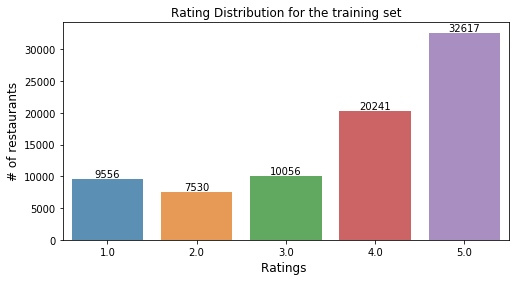

In [233]:
import seaborn as sns
#Get the distribution of the ratings
x=train_data['stars'].value_counts()
x=x.sort_index()
#plot
plt.figure(figsize=(8,4))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Rating Distribution for the training set")
plt.ylabel('# of restaurants', fontsize=12)
plt.xlabel('Ratings ', fontsize=12)

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

In [85]:
# del(reviews_words)

labels = data["stars"]

def vectorize_labels(labels, nums):
    labels = np.asarray(labels, dtype='int32')
    length = len(labels)
    Y = np.zeros((length, nums))
    for i in range(length):
        Y[i, (labels[i]-1)] = 1.
    return Y
labels = vectorize_labels(labels, 5)

train_labels = labels[:80000]
valid_labels = labels[80000:]

In [91]:
embedding_matrix.shape

(22340, 300)

In [98]:
nb_words = embedding_matrix.shape[0]

inp = Input(shape = (max_length,))
x = Embedding(nb_words, num_features, weights = [embedding_matrix], trainable = False)(inp)
x = SpatialDropout1D(0.5)(x)
x = Bidirectional(LSTM(40, return_sequences=True))(x)
x = Bidirectional(GRU(40, return_sequences=True))(x)
avg_pool = GlobalAveragePooling1D()(x)
max_pool = GlobalMaxPooling1D()(x)
conc = concatenate([avg_pool, max_pool])
outp = Dense(5, activation = 'sigmoid')(conc)

model = Model(inputs = inp, outputs = outp)
# patience is how many epochs to wait to see if val_loss will improve again.
earlystop = EarlyStopping(monitor = 'val_loss', min_delta = 0, patience = 3)
checkpoint = ModelCheckpoint(monitor = 'val_loss', save_best_only = True, filepath = 'yelp_lstm_gru_weights.hdf5')
model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [105]:
history = model.fit(x_train, train_labels, batch_size = 512, epochs = 20, validation_split = .1,
          callbacks=[earlystop, checkpoint])

Train on 72000 samples, validate on 8000 samples
Epoch 1/20
72000/72000 [==============================] - 835s 12ms/step - loss: 1.1011 - acc: 0.5315 - val_loss: 1.1013 - val_acc: 0.5335
Epoch 2/20
72000/72000 [==============================] - 831s 12ms/step - loss: 1.0846 - acc: 0.5382 - val_loss: 1.0779 - val_acc: 0.5440
Epoch 3/20
72000/72000 [==============================] - 829s 12ms/step - loss: 1.0681 - acc: 0.5436 - val_loss: 1.0666 - val_acc: 0.5479
Epoch 4/20
72000/72000 [==============================] - 830s 12ms/step - loss: 1.0484 - acc: 0.5534 - val_loss: 1.0390 - val_acc: 0.5584
Epoch 5/20
72000/72000 [==============================] - 831s 12ms/step - loss: 1.0333 - acc: 0.5580 - val_loss: 1.0198 - val_acc: 0.5666
Epoch 6/20
72000/72000 [==============================] - 830s 12ms/step - loss: 1.0172 - acc: 0.5672 - val_loss: 1.0007 - val_acc: 0.5743
Epoch 7/20
72000/72000 [==============================] - 830s 12ms/step - loss: 1.0011 - acc: 0.5725 - val_loss: 1.0

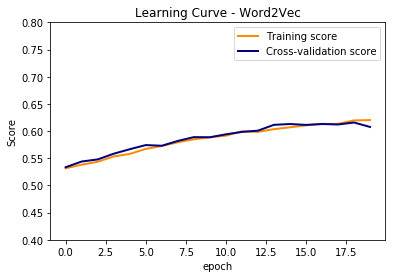

In [235]:
plt.title("Learning Curve - Word2Vec")
plt.xlabel("epoch")
plt.ylabel("Score")
plt.ylim(0.4, 0.8)
lw = 2
plt.plot(history.history['acc'], label="Training score",
             color="darkorange", lw=lw)

plt.plot(history.history['val_acc'], label="Cross-validation score",
             color="navy", lw=lw)

plt.legend(loc="best")
plt.show()

In [110]:
y_pred = model.predict([x_test], batch_size=1024, verbose = 1)

20002/20002 [==============================] - 94s 5ms/step


In [114]:
y_pred.shape

(20002, 5)

In [119]:
model.evaluate(x_test, valid_labels, verbose = 1, batch_size=1024)

20002/20002 [==============================] - 93s 5ms/step


[0.9096710684001237, 0.6118888109639316]

loss = ;  accu = 

In [122]:
from sklearn import metrics

v = metrics.classification_report(np.argmax(valid_labels, axis = 1),np.argmax(y_pred, axis = 1))
print(v)

             precision    recall  f1-score   support

          0       0.71      0.64      0.67      2373
          1       0.47      0.23      0.31      1872
          2       0.43      0.44      0.43      2510
          3       0.48      0.53      0.50      5010
          4       0.74      0.80      0.76      8237

avg / total       0.61      0.61      0.60     20002



In [123]:
model.save('yelp_w2v_LSTM_GRU_model.h5')

In [124]:
cm = metrics. confusion_matrix(np.argmax(valid_labels, axis = 1),np.argmax(y_pred, axis = 1))
print(cm)

[[1519  274  286  144  150]
 [ 402  435  663  257  115]
 [ 112  177 1096  898  227]
 [  54   29  424 2634 1869]
 [  63   10   96 1513 6555]]


Glove

In [125]:
# I'm using GLoVe word vectors to get pretrained word embeddings
embed_size = 200 
# max number of unique words 
max_features = 20000
# max number of words from review to use
num_features = 200

# File path
embedding_file = './glove/glove.twitter.27B.200d.txt'

# read in embeddings
def get_coefs(word,*arr): return word, np.asarray(arr, dtype='float32')
embeddings_index = dict(get_coefs(*o.strip().split()) for o in open(embedding_file))

In [127]:
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(train_data['text'].values))
X_train = tokenizer.texts_to_sequences(train_data['text'].values)
X_test = tokenizer.texts_to_sequences(valid_data['text'].values)
x_train = pad_sequences(X_train, maxlen = num_features)
x_test = pad_sequences(X_test, maxlen = num_features)

In [128]:
word_index = tokenizer.word_index

nb_words = min(max_features, len(word_index))
# create a zeros matrix of the correct dimensions 
embedding_matrix = np.zeros((nb_words, embed_size))
missed = []
for word, i in word_index.items():
    if i >= nb_words: break
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector
    else:
        missed.append(word)

In [129]:
len(missed)

2054

In [130]:
missed[0:10]

["it's", "don't", "i'm", "i've", "didn't", '2', '5', '3', "wasn't", "can't"]

In [133]:
inp = Input(shape = (num_features,))
x = Embedding(nb_words, embed_size, weights = [embedding_matrix], trainable = True)(inp)
x = SpatialDropout1D(0.5)(x)
x = Bidirectional(LSTM(40, return_sequences=True))(x)
x = Bidirectional(GRU(40, return_sequences=True))(x)
avg_pool = GlobalAveragePooling1D()(x)
max_pool = GlobalMaxPooling1D()(x)
conc = concatenate([avg_pool, max_pool])
outp = Dense(5, activation = 'sigmoid')(conc)

model_G = Model(inputs = inp, outputs = outp)
# patience is how many epochs to wait to see if val_loss will improve again.
earlystop = EarlyStopping(monitor = 'val_loss', min_delta = 0, patience = 3)
checkpoint = ModelCheckpoint(monitor = 'val_loss', save_best_only = True, filepath = 'yelp_lstm_gru_weights.hdf5')
model_G.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [134]:
history_G = model_G.fit(x_train, train_labels, batch_size = 512, epochs = 20, validation_split = .1,
          callbacks=[earlystop, checkpoint])

Train on 72000 samples, validate on 8000 samples
Epoch 1/20
72000/72000 [==============================] - 643s 9ms/step - loss: 1.2393 - acc: 0.4706 - val_loss: 0.9910 - val_acc: 0.5606
Epoch 2/20
72000/72000 [==============================] - 637s 9ms/step - loss: 0.9200 - acc: 0.5960 - val_loss: 0.8585 - val_acc: 0.6305
Epoch 3/20
72000/72000 [==============================] - 638s 9ms/step - loss: 0.8461 - acc: 0.6288 - val_loss: 0.8253 - val_acc: 0.6476
Epoch 4/20
72000/72000 [==============================] - 638s 9ms/step - loss: 0.8054 - acc: 0.6468 - val_loss: 0.8090 - val_acc: 0.6562
Epoch 5/20
72000/72000 [==============================] - 641s 9ms/step - loss: 0.7795 - acc: 0.6596 - val_loss: 0.7958 - val_acc: 0.6613
Epoch 6/20
72000/72000 [==============================] - 637s 9ms/step - loss: 0.7584 - acc: 0.6693 - val_loss: 0.7936 - val_acc: 0.6629
Epoch 7/20
72000/72000 [==============================] - 641s 9ms/step - loss: 0.7367 - acc: 0.6795 - val_loss: 0.7839 - v

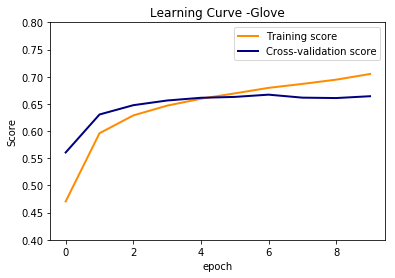

In [236]:
plt.title("Learning Curve -Glove")
plt.xlabel("epoch")
plt.ylabel("Score")
plt.ylim(0.4, 0.8)
lw = 2
plt.plot(history_G.history['acc'], label="Training score",
             color="darkorange", lw=lw)

plt.plot(history_G.history['val_acc'], label="Cross-validation score",
             color="navy", lw=lw)

plt.legend(loc="best")
plt.show()

In [143]:
model_G.save('yelp_glove_lstm_gru_model.h5')

In [142]:
y_pred = model_G.predict([x_test], batch_size=1024, verbose = 1)

20002/20002 [==============================] - 52s 3ms/step


In [144]:
model_G.evaluate(x_test, valid_labels, verbose = 1, batch_size=1024)

20002/20002 [==============================] - 50s 3ms/step


[0.7723653703829656, 0.6697830214296361]

In [148]:
v_G = metrics.classification_report(np.argmax(valid_labels, axis = 1),np.argmax(y_pred, axis = 1))
print(v_G)
cm_G = metrics.confusion_matrix(np.argmax(valid_labels, axis = 1),np.argmax(y_pred, axis = 1))
print(cm_G)

             precision    recall  f1-score   support

          0       0.71      0.82      0.76      2373
          1       0.48      0.44      0.46      1872
          2       0.53      0.44      0.48      2510
          3       0.57      0.51      0.54      5010
          4       0.77      0.85      0.81      8237

avg / total       0.66      0.67      0.66     20002

[[1948  318   53   23   31]
 [ 593  816  366   65   32]
 [ 119  484 1103  672  132]
 [  32   72  494 2565 1847]
 [  35   15   62 1160 6965]]


In [7]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import roc_auc_score

from scipy import sparse

In [18]:
from sklearn.cross_validation import train_test_split

#index = data.index
train_data, valid_data = train_test_split(data, train_size = 0.8, random_state = 123)

#train_data = data[train_index]
#valid_data = data[valid_index]

In [19]:
train_data = pd.get_dummies(train_data, columns = ['stars'])
train_data.head()

,review_id,user_id,business_id,date,text,useful,funny,cool,city,stars_1.0,stars_2.0,stars_3.0,stars_4.0,stars_5.0
975220,nYYo79DMq7ks_H8DbHmEBg,ZH9GBktJcn7iK-IP9qHqfQ,Tm2dKN_-DCdZfF2xMWrX7w,2010-12-20,This by bar is one of Cleveland's best kept se...,3.0,0.0,1.0,Cleveland,0,0,0,0,1
529568,xU6XRkHN780anOsrsSKC9A,N-rmSmFsulSrc2BtSAf3-Q,qKys2eEhVt5A7NUYMn7o7Q,2016-05-29,"Got the lounge burger, regular fries, and a ch...",1.0,0.0,0.0,Las Vegas,0,0,1,0,0
323471,vMTtB2tLL1Ws-s6VDVq4fg,Ru4OiTnRQJmWf5HGqUJKkQ,1qwkbN3wu3AGDxMTXVz2gA,2018-03-22,Rip off! Over charge for everything. Have to p...,1.0,0.0,0.0,Scottsdale,1,0,0,0,0
316407,NTifYl5-X-1SIaXm3sZabQ,anxUounz3Zc32a6zJu1-HA,nYSNN8v4up1rxIG_xKkl5Q,2017-05-11,"Good food, great service. Also love using the ...",0.0,0.0,0.0,Charlotte,0,0,0,0,1
900225,hyHN0FI1K3KPkN55IxaiZg,wi7VxOMxcJMS3rENbCglVw,HadzjG0pPrqH-t7Yv1MEKA,2018-06-05,Been going here for over 45 years and have nev...,1.0,1.0,1.0,Painesville,0,0,0,0,1


In [20]:
valid_data = pd.get_dummies(valid_data, columns = ['stars'])
valid_data.head()

,review_id,user_id,business_id,date,text,useful,funny,cool,city,stars_1.0,stars_2.0,stars_3.0,stars_4.0,stars_5.0
485217,QdGWLrIpNLXFqunVLn9eZA,HBT4E9HbG-jIKQoG75VBSw,Lhl72icGvaW2rFClTy-hog,2010-08-07,"Big Huge slices of fish, my biggest ever exper...",0.0,0.0,0.0,Peoria,0,0,0,1,0
30834,ul6LOdSdxNRcWyddxubjMg,2BYr3qIt27SOv_WMNrCFpw,ahGptHMIRIBXR9wzqZqZwA,2017-03-09,"So delicious. Our waitress, Alexis, was adorab...",0.0,0.0,0.0,Charlotte,0,0,0,0,1
298780,a_djYqfzHHI-WSLWMKzVyg,oH-pRxI7Q-qZbZaoVQHeTw,ajwGl90CuCZac3BKWY1ShQ,2016-01-21,I usually come here after 12am and I can't com...,0.0,0.0,0.0,Las Vegas,0,0,0,1,0
393367,9FVoGq3s1xT1QgusVB6_sw,3y_Z4oy22GB_IDfXyrG3Xw,ilxuZNYvLedeXLuoahjiFA,2013-12-07,Man is this place one of my favorites. From th...,4.0,0.0,1.0,Cuyahoga Falls,0,0,0,0,1
817374,WIs_1Ksr-xoqj09ncJ9kqQ,9r-Z59v4Hj5InNu01kSdtQ,4hG2j_ibsNblDgqei05U_g,2010-09-21,"I love Social house for late night dining, hap...",1.0,0.0,1.0,Las Vegas,0,0,0,1,0


In [21]:
# max_features is an upper bound on the number of words in the vocabulary
max_features = 20000
tfidf = TfidfVectorizer(max_features = max_features)

In [22]:
class NBFeatures(BaseEstimator):
    '''Class implementation of Jeremy Howards NB Linear model'''
    def __init__(self, alpha):
        # Smoothing Parameter: always going to be one for my use
        self.alpha = alpha
        
    def preprocess_x(self, x, r):
        return x.multiply(r)
    
    # calculate probabilities
    def pr(self, x, y_i, y):
        p = x[y == y_i].sum(0)
        return (p + self.alpha)/((y==y_i).sum()+self.alpha)
    
    # calculate the log ratio and represent as sparse matrix
    # ie fit the nb model
    def fit(self, x, y = None):
        self._r = sparse.csr_matrix(np.log(self.pr(x, 1, y) /self.pr(x, 0, y)))
        return self
    
    # apply the nb fit to original features x
    def transform(self, x):
        x_nb = self.preprocess_x(x, self._r)
        return x_nb

In [23]:
# Create pipeline using sklearn pipeline:
    # I basically create my tfidf features which are fed to my NB model 
    # for probability calculations. Then those are fed as input to my 
    # logistic regression model.
lr = LogisticRegression()
nb = NBFeatures(1)
p = Pipeline([
    ('tfidf', tfidf),
    ('nb', nb),
    ('lr', lr)
])

In [24]:
class_names = ['stars_1.0', 'stars_2.0', 'stars_3.0', 'stars_4.0', 'stars_5.0']
scores = []
preds = np.zeros((len(valid_data), len(class_names)))
for i, class_name in enumerate(class_names):
    train_target = train_data[class_name]    
    cv_score = np.mean(cross_val_score(estimator = p, X = train_data['text'].values, 
                                      y = train_target, cv = 3, scoring = 'accuracy'))
    scores.append(cv_score)
    print('CV score for class {} is {}'.format(class_name, cv_score))
    p.fit(train_data['text'].values, train_target)
    preds[:,i] = p.predict_proba(valid_data['text'].values)[:,1]

CV score for class stars_1.0 is 0.9206250287731289
CV score for class stars_2.0 is 0.8976246123000017
CV score for class stars_3.0 is 0.8761244023041757
CV score for class stars_4.0 is 0.7575001174365582
CV score for class stars_5.0 is 0.7423759295654434


In [26]:
t = metrics.classification_report(np.argmax(valid_data[class_names].values, axis = 1),np.argmax(preds, axis = 1))
print(t)

             precision    recall  f1-score   support

          0       0.65      0.60      0.62       248
          1       0.38      0.20      0.26       212
          2       0.40      0.23      0.29       259
          3       0.47      0.33      0.39       488
          4       0.60      0.89      0.72       793

avg / total       0.53      0.56      0.52      2000

